## Decision Trees

In [1]:
import graphviz.backend as be
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [2]:
clas = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()
X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

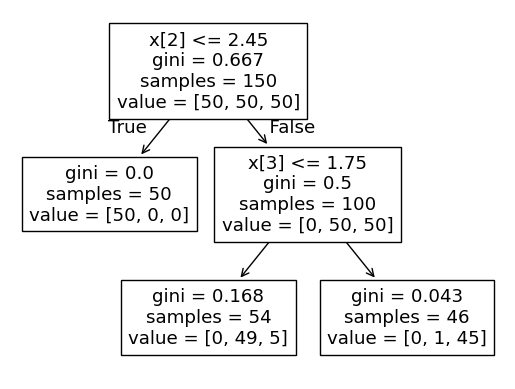

In [3]:
from sklearn.tree import plot_tree
plot_tree(clas)

## Classification 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


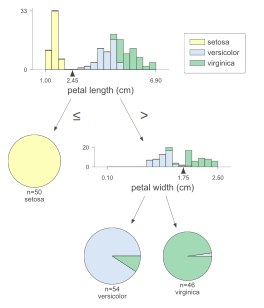

In [4]:
from dtreeviz import model

viz = model(
    clas,
    X_train,
    y_train,
    feature_names=iris.feature_names,
    class_names=["setosa", "versicolor", "virginica"]
)

viz.view()


# Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor
from dtreeviz import model
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X_train = data.data
y_train = data.target
feature_names = data.feature_names

# Train
regr = DecisionTreeRegressor(max_depth=1)
regr.fit(X_train, y_train)

# Visualize
viz = model(
    regr,
    X_train,
    y_train,
    target_name='MedHouseValue',
    feature_names=feature_names,
)

viz.view()


# Horizontal Decision Tree

In [9]:
from dtreeviz import model
from IPython.display import SVG, display

viz = model(
    clas,
    X_train,
    y_train,
    feature_names=iris.feature_names,
    class_names=["setosa", "versicolor", "virginica"]
)

viz.view()


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 4 features as input.

# Show Prediction Path

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


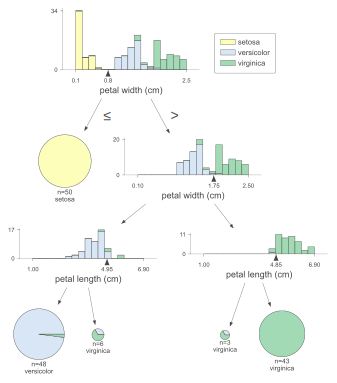

In [15]:
from dtreeviz import model
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load and train
iris = load_iris()
X_train = iris.data
y_train = iris.target
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Random sample (reshape to 2D)
X = X_train[np.random.randint(0, len(X_train)), :].reshape(1, -1)

# Visualize
viz = model(
    clf,
    X_train,
    y_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)

# Display inline (Jupyter)
viz.view()


In [16]:
X


array([4.6, 3.1, 1.5, 0.2])

## Show Node Number

In [17]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               show_node_labels=True)
viz

NameError: name 'dtreeviz' is not defined

#  Without Any graphs

In [ ]:
viz = model(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               fancy=False)
viz

TypeError: model() got an unexpected keyword argument 'orientation'

## Show just prediction path, nothing else

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


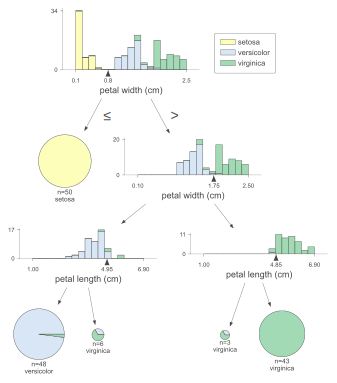

In [20]:
from dtreeviz import model
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load iris
iris = load_iris()
X_train = iris.data
y_train = iris.target

# Train
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Optional: highlight a sample
X_sample = X_train[np.random.randint(0, len(X_train)), :].reshape(1, -1)

# Visualize
viz = model(
    clf,
    X_train,
    y_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)

# Render in Jupyter
viz.view()


# Prediction Path in Plain english

In [22]:
from dtreeviz.trees import explain_prediction_path

# Single prediction path in plain English
text = explain_prediction_path(
    clf,                 # your trained DecisionTreeClassifier
    X_sample,            # 2D array
    feature_names=iris.feature_names,
    explanation_type="plain_english"
)

print(text)

     

ImportError: cannot import name 'explain_prediction_path' from 'dtreeviz.trees' (c:\Users\ANTARIKSHYA\OneDrive\Desktop\Machine-Learning\.venv\Lib\site-packages\dtreeviz\trees.py)

## Feature Importance

In [21]:
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="sklearn_default"))
     

NameError: name 'explain_prediction_path' is not defined

# Univariate Regression

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

df_cars = pd.read_csv("cars.csv")
X, y = df_cars[['WGT']], df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'WGT', 'MPG', ax=ax)
plt.show()

KeyError: "None of [Index(['WGT'], dtype='object')] are in the [columns]"

# 3-D Regression

In [25]:
df_cars = pd.read_csv("cars.csv")

df_cars

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2  
25     4     1  
26     5     2  
27     5     2  
28     5     4  
29     5     6  
30     5     8  
31     4     2

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *


X = df_cars[['WGT','ENG']]
y = df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dt,
                      X, y,
                      feature_names=['Vehicle Weight', 'Horse Power'],
                      target_name='MPG',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()

KeyError: "None of [Index(['WGT', 'ENG'], dtype='object')] are in the [columns]"